In [3]:
import pandas as pd
import numpy as np
import pymysql
from pymysql.constants import CLIENT
from dotenv import load_dotenv
import os
import matplotlib.pyplot as plt


In [6]:
ruta = './data/Environment_Temperature_change_E_All_Data_NOFLAG.csv'
df_original = pd.read_csv(ruta, encoding='latin-1', sep=',')
print('Cabezera del DataFrame original: ')
print(df_original.head())
print('Dimensiones del DataFrame original: ')
print(df_original.info())

Cabezera del DataFrame original: 
   Area Code         Area  Months Code    Months  Element Code  \
0          2  Afghanistan         7001   January          7271   
1          2  Afghanistan         7001   January          6078   
2          2  Afghanistan         7002  February          7271   
3          2  Afghanistan         7002  February          6078   
4          2  Afghanistan         7003     March          7271   

              Element Unit  Y1961  Y1962  Y1963  ...  Y2010  Y2011  Y2012  \
0  Temperature change   °C  0.777  0.062  2.744  ...  3.601  1.179 -0.583   
1  Standard Deviation   °C  1.950  1.950  1.950  ...  1.950  1.950  1.950   
2  Temperature change   °C -1.743  2.465  3.919  ...  1.212  0.321 -3.201   
3  Standard Deviation   °C  2.597  2.597  2.597  ...  2.597  2.597  2.597   
4  Temperature change   °C  0.516  1.336  0.403  ...  3.390  0.748 -0.527   

   Y2013  Y2014  Y2015  Y2016  Y2017  Y2018  Y2019  
0  1.233  1.755  1.943  3.416  1.201  1.996  2.951  


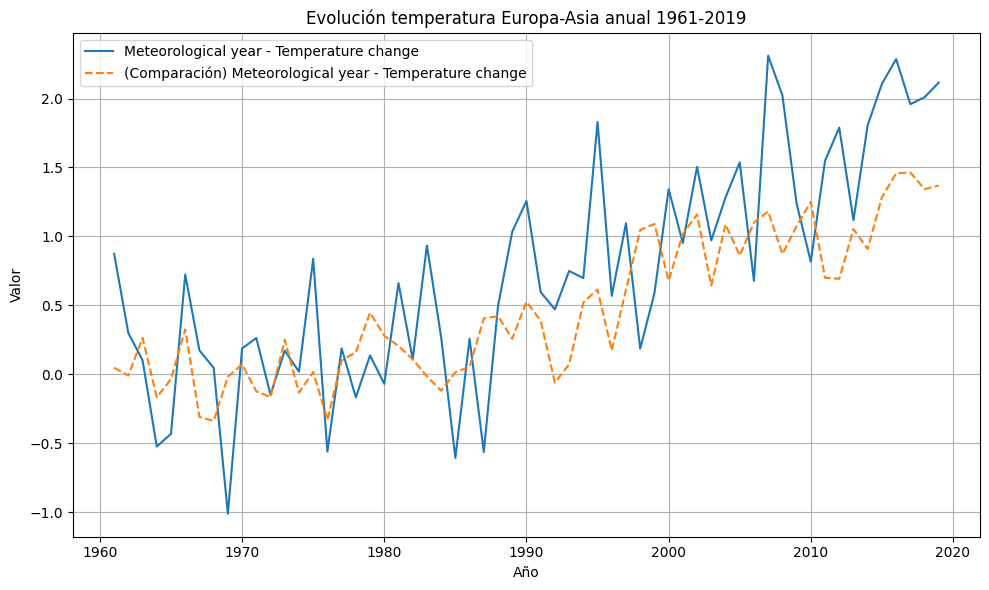

In [17]:

import pandas as pd
import matplotlib.pyplot as plt

def graficar_datos(
    df_original,
    area_code=None,
    month_code=None,
    element_code=None,
    area_code_2=None,
    month_code_2=None,
    element_code_2=None,
    titulo="Evolución de datos"
):
    # Generar lista de años: 1961 a 2019
    años = list(range(1961, 2020))
    columnas_valores = [f'Año_{i+1}' for i in range(len(años))]

    # Asignar nombres de columnas si aún no están asignadas
    columnas_fijas = ['Area Code', 'Area', 'Month Code', 'Month', 'Element Code', 'Element', 'Unit']
    if len(df_original.columns) == len(columnas_fijas) + len(años):
        df_original.columns = columnas_fijas + columnas_valores

    # Convertir valores numéricos
    for col in columnas_valores:
        df_original[col] = pd.to_numeric(df_original[col], errors='coerce')

    plt.figure(figsize=(10, 6))

    # Primera serie
    df1 = df_original.copy()
    if area_code:
        df1 = df1[df1['Area Code'] == int(area_code)]
    if month_code:
        df1 = df1[df1['Month Code'] == int(month_code)]
    if element_code:
        df1 = df1[df1['Element Code'] == int(element_code)]

    if df1.empty:
        print("⚠️ No se encontraron datos para la primera serie con esos filtros.")
    else:
        for _, row in df1.iterrows():
            valores = row[columnas_valores].values
            plt.plot(años, valores, label=f"{row['Month']} - {row['Element']}")

    # Segunda serie
    if area_code_2 or month_code_2 or element_code_2:
        df2 = df_original.copy()
        if area_code_2:
            df2 = df2[df2['Area Code'] == int(area_code_2)]
        if month_code_2:
            df2 = df2[df2['Month Code'] == int(month_code_2)]
        if element_code_2:
            df2 = df2[df2['Element Code'] == int(element_code_2)]

        if df2.empty:
            print("⚠️ No se encontraron datos para la segunda serie.")
        else:
            for _, row in df2.iterrows():
                valores = row[columnas_valores].values
                plt.plot(años, valores, linestyle='--', label=f"(Comparación) {row['Month']} - {row['Element']}")

    plt.xlabel("Año")
    plt.ylabel("Valor")
    plt.title(titulo)
    plt.legend()
    plt.grid(True)
    plt.tight_layout()
    plt.show()



graficar_datos(df_original, area_code=5400, month_code=7020, element_code=7271, titulo="Evolución temperatura Europa-Asia anual 1961-2019",area_code_2=5300, month_code_2=7020, element_code_2=7271)